In [19]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import xgboost as xgb

%matplotlib inline

In [56]:
boston = datasets.load_boston()
boston.data.shape

(506, 13)

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [58]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [48]:
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.1)

In [49]:
dm_train = xgb.DMatrix(x_train, label=y_train, feature_names=boston.feature_names)
dm_test = xgb.DMatrix(x_test, label=y_test, feature_names=boston.feature_names)
dm_all = xgb.DMatrix(boston.data, label=boston.target)

In [50]:
params = {'max_depth':2, 'eta':1, 'silent':1}

In [53]:
xgb.cv(params, dm_all, nfold=10, num_boost_round=20)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,5.016832,0.108346,5.687382,0.606549
1,4.266937,0.160774,5.568742,0.905992
2,3.933112,0.186075,5.326640,0.896344
3,3.632758,0.208600,5.248463,0.966865
4,3.404093,0.202455,5.133123,0.961306
5,3.178625,0.179351,5.106645,1.096102
6,3.018924,0.177448,5.011721,1.137643
7,2.864581,0.154204,4.861236,1.220163
8,2.748366,0.145339,4.809740,1.177875
9,2.651065,0.144020,4.669718,1.065264


In [74]:
bst = xgb.train(params, dm_train, evals=[(dm_train, 'train'), (dm_test, 'test')], num_boost_round=20)

[0]	train-rmse:5.0339	test-rmse:7.35861
[1]	train-rmse:4.35272	test-rmse:7.81306
[2]	train-rmse:4.0227	test-rmse:7.26551
[3]	train-rmse:3.77298	test-rmse:6.26963
[4]	train-rmse:3.37565	test-rmse:6.16297
[5]	train-rmse:3.16388	test-rmse:6.51111
[6]	train-rmse:3.03517	test-rmse:6.47379
[7]	train-rmse:2.81629	test-rmse:6.16311
[8]	train-rmse:2.70514	test-rmse:6.11668
[9]	train-rmse:2.54936	test-rmse:5.78015
[10]	train-rmse:2.46409	test-rmse:5.86044
[11]	train-rmse:2.38159	test-rmse:5.92282
[12]	train-rmse:2.33529	test-rmse:5.94759
[13]	train-rmse:2.258	test-rmse:5.87949
[14]	train-rmse:2.20279	test-rmse:5.82134
[15]	train-rmse:2.16787	test-rmse:5.8451
[16]	train-rmse:2.10438	test-rmse:5.83845
[17]	train-rmse:2.07597	test-rmse:5.83323
[18]	train-rmse:2.03298	test-rmse:5.84822
[19]	train-rmse:1.99505	test-rmse:5.80941


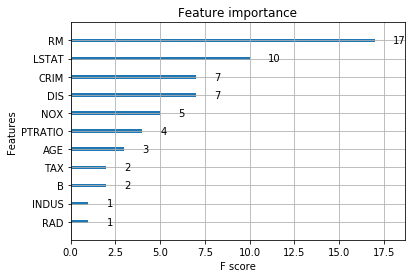

In [76]:
xgb.plot_importance(bst)

In [77]:
bst.save_model('sample.xgb')

In [78]:
bst = xgb.Booster()
bst.load_model('sample.xgb')

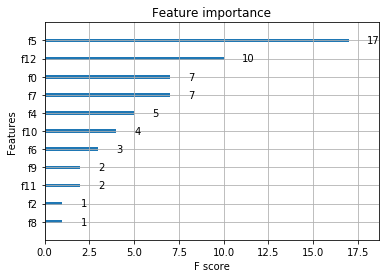

In [79]:
xgb.plot_importance(bst)